<img src="images/rentacar.png">
<center>Ilustração por Abhishek.</center>

# 🚘 ANÁLISE DE CHURN EM ALUGUÉIS DE CARRO

O gerenciamento do relacionamento com os clientes tem como um dos seus objetivos
centrais aumentar o número de clientes ativos da empresa - e a retenção desses clientes é crítica
para seu sucesso. Sendo assim, um time foi mobilizado para garantir o desenvolvimento da
estratégia de retenção de clientes e, sabendo do seu potencial analítico, você foi convocado para
esse desafio.

Em busca de uma maior compreensão das particularidades do negócio e de melhor
entendimento do cenário do churn, vocês optaram por realizar uma análise exploratória dos
dados. Em um primeiro momento algumas hipóteses foram levantadas visando direcionar esse
desenvolvimento inicial e, considerando a base de dados disponibilizada e um período de churn
de 1 ano, foi requisitado a você a validação da seguinte hipótese:

<p></p>
<p></p>
<p></p>

<center><b>“O churn de novos clientes é maior do que o churn de clientes ativos”.</b></center>

<p></p>
<p></p>
<p></p>

________


## Metodologia Escolhida

A metodologia utilizada nessa análise é verificar se os clientes que alugaram carros em um ano, voltaram a alugar no ano seguinte. Essa métrica caracterizará o Churn de Clientes ativos.

Da mesma forma, será analisado se os novos clientes conquistados em um ano, voltaram a alugar carros no ano que o sucede. Aqui, temos o Churn de Clientes Novos.

Esses indicadores de churn serão desenvolvidos para cada ano. Ao final da jornada, será verificada a média de churn no período analisado, para os clientes ativos e os clientes novos, a fim de aceitar ou rejeitar a hipótese.

É interessante pontuar que existem outros métodos para se mensurar a retenção e evasão de clientes, e até mesmo neste problema de negócio seria possível utilizar outras formas e levar em consideração outras variáveis para se definir o que é um cliente ativo e o que é um cliente novo.

Por fim, durante todo o decorrer da análise, desde as importações até a verificação de correlação, os códigos foram comentados para que fique mais claro o que o candidato está executando.

_______

# 0.0 Importações

## 0.1 Bibliotecas

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import datetime
import scipy.stats as stats

from dateutil.relativedelta import relativedelta

sns.set()

## 0.2 Funções de suporte

In [2]:
def calcular_churn(x,y):
    n= x.shape[0]
    n_total= y.shape[0]
    
    return (1-(n/n_total))

## 0.3 Dataset

In [3]:
df = pd.read_csv('data/base_teste.csv')

In [4]:
df.head()

,Unnamed: 0,cidade_retirada,cidade_devolucao,cd_contrato,transporte_locado,data_abertura_contrato,qtd_diarias,data_fechamento_contrato,qtd_hora_extra,cd_cliente
0,0,Hogsmeade,Hogsmeade,HGM048798,Portal,2015-01-26 05:58:37,1,2015-01-27 05:58:37,0,1
1,1,Springfield,Springfield,SPF030834,Ônibus Escolar,2015-02-05 15:10:19,1,2015-02-06 15:10:19,0,1
2,2,Porto Real,Porto Real,PRL017782,Barco,2015-05-04 20:49:56,1,2015-05-05 20:49:56,0,1
3,3,Basin City,Basin City,SIN042621,1960 Corvette,2015-05-07 07:34:04,1,2015-05-08 07:34:04,0,1
4,4,Godric's Hollow,Godric's Hollow,GDH044954,Testralio,2015-08-01 11:14:48,2,2015-08-03 12:14:48,1,1


# 1.0 Descrição dos Dados

In [5]:
df1 = df.copy()

## 1.1 Tipagem dos dados

In [6]:
df1.dtypes

Unnamed: 0                   int64
cidade_retirada             object
cidade_devolucao            object
cd_contrato                 object
transporte_locado           object
data_abertura_contrato      object
qtd_diarias                  int64
data_fechamento_contrato    object
qtd_hora_extra               int64
cd_cliente                   int64
dtype: object

In [7]:
# modificando o tipo dos dados para datetime

df1['data_abertura_contrato'] = pd.to_datetime(df1['data_abertura_contrato'])
df1['data_fechamento_contrato'] = pd.to_datetime(df1['data_fechamento_contrato'])

## 1.2 Checagem de valores faltantes

In [8]:
df1.isnull().sum()

Unnamed: 0                  0
cidade_retirada             0
cidade_devolucao            0
cd_contrato                 0
transporte_locado           0
data_abertura_contrato      0
qtd_diarias                 0
data_fechamento_contrato    0
qtd_hora_extra              0
cd_cliente                  0
dtype: int64

# 2.0 Modelagem de Dados

In [9]:
df1['data_abertura_contrato'].min(), df1['data_abertura_contrato'].max()

(Timestamp('2015-01-01 00:04:56'), Timestamp('2020-12-31 23:54:45'))

In [10]:
# criando uma coluna de 'ano' para encontrar o churn anual

df1['ano'] = (df1['data_abertura_contrato']).dt.year

In [11]:
df1.head()

,Unnamed: 0,cidade_retirada,cidade_devolucao,cd_contrato,transporte_locado,data_abertura_contrato,qtd_diarias,data_fechamento_contrato,qtd_hora_extra,cd_cliente,ano
0,0,Hogsmeade,Hogsmeade,HGM048798,Portal,2015-01-26 05:58:37,1,2015-01-27 05:58:37,0,1,2015
1,1,Springfield,Springfield,SPF030834,Ônibus Escolar,2015-02-05 15:10:19,1,2015-02-06 15:10:19,0,1,2015
2,2,Porto Real,Porto Real,PRL017782,Barco,2015-05-04 20:49:56,1,2015-05-05 20:49:56,0,1,2015
3,3,Basin City,Basin City,SIN042621,1960 Corvette,2015-05-07 07:34:04,1,2015-05-08 07:34:04,0,1,2015
4,4,Godric's Hollow,Godric's Hollow,GDH044954,Testralio,2015-08-01 11:14:48,2,2015-08-03 12:14:48,1,1,2015


## 2.1 Clientes de 2015

In [12]:
# filtro do ano analisado

clientes_ativos_2015 = df1[['cd_cliente','qtd_diarias']][df1['ano'] == 2015]

# removendo clientes duplicados

clientes_ativos_2015.drop_duplicates('cd_cliente',keep="first", inplace=True)

# renomeando colunas

clientes_ativos_2015.columns = ['cd_cliente', 'status_comparado_2015']

# definindo todos os clientes do período como 'ativo'

clientes_ativos_2015['status_comparado_2015'] = 'Ativo'

In [13]:
clientes_ativos_2015.head()

,cd_cliente,status_comparado_2015
0,1,Ativo
36,2,Ativo
79,3,Ativo
116,4,Ativo
152,5,Ativo


In [14]:
clientes_ativos_2015.shape

(26892, 2)

## 2.2 Clientes de 2016

In [15]:
# filtro do ano analisado

clientes_ativos_2016 = df1[['cd_cliente','qtd_diarias']][df1['ano'] == 2016]

# removendo clientes duplicados

clientes_ativos_2016.drop_duplicates('cd_cliente',keep="first", inplace=True)

# renomeando colunas

clientes_ativos_2016.columns = ['cd_cliente', 'status_comparado_2016']

# definindo os clientes como ativos

clientes_ativos_2016['status_comparado_2016'] = 'Ativo'

### 2.2.1 Churn de Clientes Ativos

In [16]:
# encontrando os clientes de 2015 que voltaram a alugar em 2016

clientes_ativos_2016 = pd.merge(clientes_ativos_2016, clientes_ativos_2015, how='left', on='cd_cliente')


In [17]:
# verificando os clientes novos de 2016, ou seja, que não alugaram em 2015

clientes_ativos_2016.isnull().sum()

cd_cliente                  0
status_comparado_2016       0
status_comparado_2015    6852
dtype: int64

In [18]:
# os valores nulos aqui são de clientes que fizeram seu primeiro aluguel, portanto, comparado a 2015, são 'clientes novos'

clientes_ativos_2016['status_comparado_2015'] = clientes_ativos_2016['status_comparado_2015'].fillna('Novo')

In [19]:
# possuindo o número de clientes de 2015 que voltaram a alugar em 2016, é possível encontrar o churn anual

n = clientes_ativos_2016[clientes_ativos_2016['status_comparado_2015']=='Ativo']
n_total = clientes_ativos_2015

churn_ativos_2016 = calcular_churn(n, n_total)
churn_ativos_2016

0.2589245872378403

Dessa forma, é possível dizer que **26% dos clientes** que alugaram um carro em 2015, não voltaram a alugar em 2016.
_______

## 2.3 Clientes de 2017

In [20]:
# criando o df a ser utilizado tanto no cálculo de churn de clientes ativos, quando no churn de clientes novos

clientes_2017 = df1[['cd_cliente','qtd_diarias']][df1['ano'] == 2017]

clientes_2017.drop_duplicates('cd_cliente',keep="first", inplace=True)

# df de clientes ativos

clientes_ativos_2017 = clientes_2017.copy()

clientes_ativos_2017.columns = ['cd_cliente', 'status_comparado_2017']

clientes_ativos_2017['status_comparado_2017'] = 'Ativo'

### 2.3.1 Churn de Clientes Ativos

In [21]:
# verirficando os clientes que alugaram um carro em 2016 e voltaram a alugar em 2017

clientes_ativos_2017 = pd.merge(clientes_ativos_2017, clientes_ativos_2016[['cd_cliente', 'status_comparado_2016']], 
                                how='left', on='cd_cliente')

# aqueles que não foram encontrados em 2016, é porque são novos clientes de 2017

clientes_ativos_2017['status_comparado_2016'] = clientes_ativos_2017['status_comparado_2016'].fillna('Novo')

In [22]:
n = clientes_ativos_2017[clientes_ativos_2017['status_comparado_2016']=='Ativo']
n_total = clientes_ativos_2016

churn_ativos_2017 = calcular_churn(n, n_total)
churn_ativos_2017

0.2584668234942683

O churn de clientes ativos em 2017 **se manteve em 26%**.

### 2.3.2 Churn de Clientes Novos

In [23]:
# relembrando as variáveis do dataframe de 2016

clientes_ativos_2016.head()

,cd_cliente,status_comparado_2016,status_comparado_2015
0,1,Ativo,Ativo
1,2,Ativo,Ativo
2,3,Ativo,Ativo
3,4,Ativo,Ativo
4,5,Ativo,Ativo


In [24]:
# criando um df auxiliar para encontrar os clientes novos conquistados em 2016

aux1 = clientes_ativos_2016[['cd_cliente','status_comparado_2015']]

aux1 = aux1[aux1['status_comparado_2015']=='Novo']

aux1.columns = ['cd_cliente', 'status']

In [25]:
aux1.head()

,cd_cliente,status
2562,2565,Novo
2640,2644,Novo
2959,2963,Novo
3358,3363,Novo
3783,3790,Novo


In [26]:
# df de clientes novos

clientes_novos_2017 = clientes_2017.copy()

# verificando os clientes conquistados em 2016 que voltaram a comprar em 2017

clientes_novos_2017 = pd.merge(clientes_2017, aux1, how='left', on='cd_cliente')

# mantendo apenas os registros encontrados, ou seja, os clientes de 2017 que alugaram pela primeira vez em 2016

clientes_novos_2017.dropna(inplace=True)

In [27]:
clientes_novos_2017.head()

,cd_cliente,qtd_diarias,status
2563,2565,3,Novo
2642,2644,5,Novo
2961,2963,14,Novo
3360,3363,2,Novo
3785,3790,1,Novo


In [28]:
# agora tendo o número total de clientes novos em 2016 e quantos deles voltaram a alugar em 2017, é possível encontrar o churn

n = clientes_novos_2017
n_total = aux1

churn_novos_2017 = calcular_churn(n, n_total)
churn_novos_2017

0.5888791593695272

Segundo o cálculo, **59% dos novos clientes** conquistados em 2016 não voltaram a alugar novamente em 2017.
__________

## 2.4 Clientes de 2018

In [29]:
clientes_2018 = df1[['cd_cliente','qtd_diarias']][df1['ano'] == 2018]

clientes_2018.drop_duplicates('cd_cliente',keep="first", inplace=True)

clientes_ativos_2018 = clientes_2018.copy()

clientes_ativos_2018.columns = ['cd_cliente', 'status_comparado_2018']

clientes_ativos_2018['status_comparado_2018'] = 'Ativo'

### 2.4.1 Churn de Clientes Ativos

In [30]:
# verificando os clientes de 2017 que voltaram a alugar em 2018

clientes_ativos_2018 = pd.merge(clientes_ativos_2018, clientes_ativos_2017[['cd_cliente', 'status_comparado_2017']], 
                                how='left', on='cd_cliente')

In [31]:
# valores nulos são clientes novos

clientes_ativos_2018.isnull().sum()

cd_cliente                  0
status_comparado_2018       0
status_comparado_2017    6997
dtype: int64

In [32]:
# preenchendo os nulos com 'Novo', sinalizando um cliente conquistado nesse ano de 2018

clientes_ativos_2018['status_comparado_2017'] = clientes_ativos_2018['status_comparado_2017'].fillna('Novo')

In [33]:
# churn dos clientes ativos em 2017 que não voltaram a alugar carros em 2018

n = clientes_ativos_2018[clientes_ativos_2018['status_comparado_2017']=='Ativo']
n_total = clientes_ativos_2017

churn_ativos_2018 = calcular_churn(n, n_total)
churn_ativos_2018

0.25619220914256

Novamente, o churn de clientes ativos **segue uma constante de 26%**.

### 2.4.2 Churn de Clientes Novos

In [34]:
# df auxiliar de clientes conquistados em 2017

aux2 = clientes_ativos_2017[['cd_cliente','status_comparado_2016']]

aux2 = aux2[aux2['status_comparado_2016']=='Novo']

aux2.columns = ['cd_cliente', 'status']

In [35]:
# df de clientes novos

clientes_novos_2018 = clientes_2018.copy()

# verificando os clientes conquistados em 2017 que voltaram a alugar em 2018

clientes_novos_2018 = pd.merge(clientes_novos_2018, aux2, how='left', on='cd_cliente')

# mantendo apenas os registros encontrados, ou seja, os clientes de 2018 que alugaram pela primeira vez em 2017

clientes_novos_2018.dropna(inplace=True)

In [36]:
# calculando o churn dos clientes conquistados em 2017 que não voltaram a alugar em 2018

n = clientes_novos_2018
n_total = aux2

churn_novos_2018 = calcular_churn(n, n_total)
churn_novos_2018

0.5738330975954739

Dessa vez, **57% dos clientes** conquistados em 2017, não voltaram a alugar carros em 2018.
_____

## 2.5 Clientes de 2019

In [37]:
clientes_2019 = df1[df1['ano'] == 2019]

clientes_2019 = clientes_2019[['cd_cliente','qtd_diarias']].groupby('cd_cliente').count().reset_index()

clientes_ativos_2019 = clientes_2019.copy()

clientes_ativos_2019.columns = ['cd_cliente', 'status_comparado_2019']

clientes_ativos_2019['status_comparado_2019'] = 'Ativo'

### 2.5.1 Churn de Clientes Ativos

In [38]:
clientes_ativos_2019 = pd.merge(clientes_ativos_2019, clientes_ativos_2018[['cd_cliente', 'status_comparado_2018']], 
                                how='left', on='cd_cliente')

In [39]:
clientes_ativos_2019.isnull().sum()

cd_cliente                  0
status_comparado_2019       0
status_comparado_2018    6945
dtype: int64

In [40]:
# os clientes de 2019 que não alugaram carros em 2018 são considerados como novos

clientes_ativos_2019['status_comparado_2018'] = clientes_ativos_2019['status_comparado_2018'].fillna('Novo')

In [41]:
# calculo do churn de clientes ativos em 2019

n = clientes_ativos_2019[clientes_ativos_2019['status_comparado_2018']=='Ativo']
n_total = clientes_ativos_2018

churn_ativos_2019 = calcular_churn(n, n_total)
churn_ativos_2019

0.25770525770525765

O churn de clientes ativos **continua nos 26%**.

### 2.5.1 Churn de Clientes Novos

In [42]:
# df auxiliar

aux3 = clientes_ativos_2018[['cd_cliente','status_comparado_2017']]

aux3 = aux3[aux3['status_comparado_2017']=='Novo']

aux3.columns = ['cd_cliente', 'status']

In [43]:
# df de clientes novos

clientes_novos_2019 = clientes_2019.copy()

# verificando os clientes que alugaram carros pela primeira vez em 2018 e voltaram a alugar em 2019

clientes_novos_2019 = pd.merge(clientes_novos_2019, aux3, how='left', on='cd_cliente')

# mantendo apenas os registros encontrados

clientes_novos_2019.dropna(inplace=True)

In [44]:
# calculando o churn dos clientes conquistados em 2018 que não voltaram a alugar em 2019

n = clientes_novos_2019
n_total = aux3

churn_novos_2019 = calcular_churn(n, n_total)
churn_novos_2019

0.576246962984136

O cálculo mostra que **58% dos clientes** conquistados em 2018 não voltaram a alugar carros em 2019.
_____

## 2.6 Clientes de 2020

In [45]:
clientes_2020 = df1[df1['ano'] == 2020]

clientes_2020 = clientes_2020[['cd_cliente','qtd_diarias']].groupby('cd_cliente').count().reset_index()

clientes_ativos_2020 = clientes_2020.copy()

clientes_ativos_2020.columns = ['cd_cliente', 'status_comparado_2020']

clientes_ativos_2020['status_comparado_2020'] = 'Ativo'

### 2.6.1 Churn de Clientes Ativos

In [46]:
clientes_ativos_2020 = pd.merge(clientes_ativos_2020, clientes_ativos_2019[['cd_cliente', 'status_comparado_2019']], 
                                how='left', on='cd_cliente')

In [47]:
clientes_ativos_2020.isnull().sum()

cd_cliente                  0
status_comparado_2020       0
status_comparado_2019    7071
dtype: int64

In [48]:
clientes_ativos_2020['status_comparado_2019'] = clientes_ativos_2020['status_comparado_2019'].fillna('Novo')

In [49]:
# calculo do churn de ativos

n = clientes_ativos_2020[clientes_ativos_2020['status_comparado_2019']=='Ativo']
n_total = clientes_ativos_2019

churn_ativos_2020 = calcular_churn(n, n_total)
churn_ativos_2020

0.2609693783093272

O churn de clientes ativos continua **estável em 26%**.

### 2.6.2 Churn de Clientes Novos

In [50]:
# df auxiliar

aux4 = clientes_ativos_2019[['cd_cliente','status_comparado_2018']]

aux4 = aux4[aux4['status_comparado_2018']=='Novo']

aux4.columns = ['cd_cliente', 'status']

In [51]:
# df de clientes novos

clientes_novos_2020 = clientes_2020.copy()

# verificando os clientes que alugaram carros pela primeira vez em 2019 e voltaram a alugar em 2020

clientes_novos_2020 = pd.merge(clientes_novos_2020, aux4, how='left', on='cd_cliente')

# mantendo apenas os registros encontrados

clientes_novos_2020.dropna(inplace=True)

In [52]:
# calculando o churn dos clientes conquistados em 2019 que não voltaram a alugar em 2020

n = clientes_novos_2020
n_total = aux4

churn_novos_2020 = calcular_churn(n, n_total)
churn_novos_2020


0.5946724262059035

Finalmente, o último período da série analisada mostra que **59% dos clientes** conquistados em 2019 não voltaram a alugar carros em 2020.
_____

# 3.0 Conclusão

## 3.1 Hipótese Analisada
### “O churn de novos clientes é maior do que o churn de clientes ativos”

In [53]:
# criando um df com os resultados

churn_clientes = pd.DataFrame({'ano':[2016, 2017, 2018, 2019, 2020],
                       'churn_clientes_ativos':[churn_ativos_2016, churn_ativos_2017, churn_ativos_2018,
                                                churn_ativos_2019, churn_ativos_2020],
                       'churn_clientes_novos':[np.nan,churn_novos_2017,churn_novos_2018,churn_novos_2019, churn_novos_2020 ]})

churn_clientes

,ano,churn_clientes_ativos,churn_clientes_novos
0,2016,0.258925,NaN
1,2017,0.258467,0.588879
2,2018,0.256192,0.573833
3,2019,0.257705,0.576247
4,2020,0.260969,0.594672


**Observações:**

- Como o início da jornada é em 2015, esse ano não apresentará churn, por não possuir período anterior para se comparar o número de clientes;
- O ano de 2016 foi o primeiro a poder identificar o número de clientes novos conquistados, portanto esse churn só tem início em 2017, quando compararmos os números dos dois anos.

Para que fique mais justo, o ano de 2016 não será considerado para o cálculo das médias, pois nesse período não temos o Churn de Clientes Novos. Consideraremos então o período de 2017-2020 para a comparação.

In [54]:
churn_clientes.dropna(inplace=True)

In [55]:
churn_clientes

,ano,churn_clientes_ativos,churn_clientes_novos
1,2017,0.258467,0.588879
2,2018,0.256192,0.573833
3,2019,0.257705,0.576247
4,2020,0.260969,0.594672


In [56]:
# calculando a média dos churnes no período analisado

perc_churn_ativos = (churn_clientes.iloc[:,1:].mean()[0])*100
perc_churn_novos = (churn_clientes.iloc[:,1:].mean()[1])*100

print('Média de Churn de Clientes Ativos: {:,.2f}%'.format(perc_churn_ativos))
print('Média de Churn de Clientes Novos: {:,.2f}%'.format(perc_churn_novos))

Média de Churn de Clientes Ativos: 25.83%
Média de Churn de Clientes Novos: 58.34%


**Hipótese aceita**. No período analisado, a média do Churn de Clientes Novos é 58.34%, e o de Clientes Ativos, 25.83%.

## 3.2 Correlação entre as variáveis

Como existe uma sobreposição, o 'Churn de Clientes Novos' está dentro do 'Churn de Clientes Ativos'. Dessa forma, qual a correlação entre essas duas variáveis? Aqui, são utilizados o QQ Plot e o teste de Shapiro-Wilk no 'churn_clientes_ativos', para verificar a normalidade da distribuição e decidir entre o método de correlação de **Pearson** ou **Spearman**.

### 3.2.1 Normal QQ-Plot

Text(0.5, 1.0, 'NORMAL QQ PLOT')

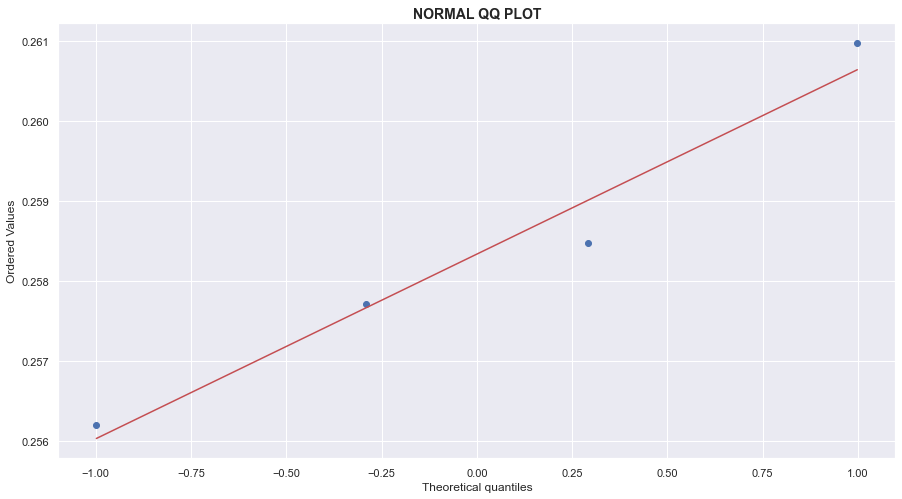

In [57]:
plt.figure(figsize=(15,8))

stats.probplot(churn_clientes['churn_clientes_ativos'], dist='norm', plot=plt)
plt.title('NORMAL QQ PLOT', fontsize=14, fontweight='bold')

A distribuição da variável está muito próxima à distribuição teórica, representando uma normalidade.

### 3.2.2 Shapiro-Wilk

Antes de realizar a análise de correlação, faz-se o teste de normalidade para verificar qual metódo de correlação utilizar, Pearson, Kendall ou Spearman.

Nível de significância de 0,05 ou 5%

- Ho = distribuição normal: p>0.05;

- Ha = distribuição não normal: p<=0.05

In [58]:
stats.shapiro(churn_clientes['churn_clientes_ativos'])

ShapiroResult(statistic=0.9733506441116333, pvalue=0.8621094226837158)

Como o p-valor se apresentou superior a 0.05, **será considerada distribuição normal** e, portanto, será utilizado o método de Pearson.

### 3.2.3 Heatmap

Text(0.5, 1.0, 'CORRELAÇÃO ENTRE O CHURN DE ATIVOS E O CHURN DE NOVOS CLIENTES')

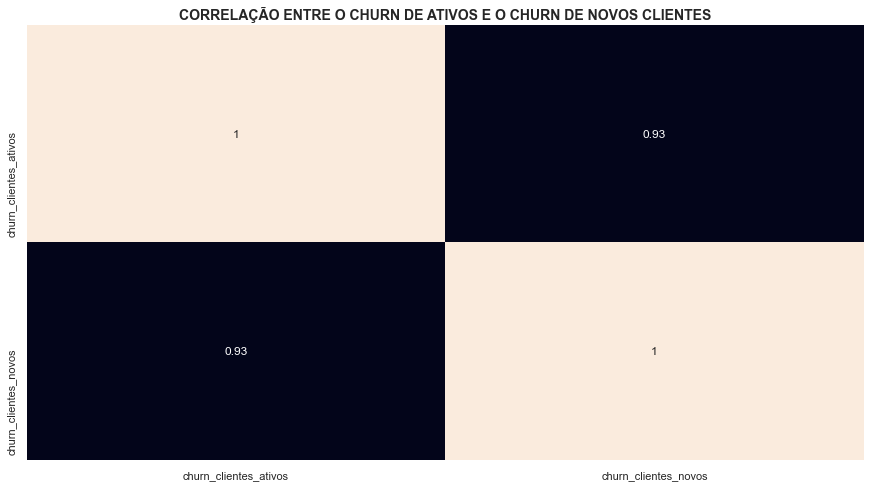

In [59]:
correlacao = churn_clientes[['churn_clientes_ativos','churn_clientes_novos']].corr(method='pearson')


plt.figure(figsize=(15,8))
sns.heatmap(correlacao, cbar=False, annot=True)
plt.title('CORRELAÇÃO ENTRE O CHURN DE ATIVOS E O CHURN DE NOVOS CLIENTES',fontsize=14, fontweight='bold')

### 3.2.3.1 Interpretação

Como era esperado, existe uma correlação muito forte entre o 'Churn de Clientes Ativos' e o 'Churn de Clientes Novos'. Visto que o churn dos clientes novos fica próximo dos 60%, se a empresa conseguir reduzir esse indicador, estará conseguindo reduzir também o churn em geral. 

Algumas formas a se considerar para fazer com que esse cliente novo siga alugando os carros da empresa é conceder descontos nos primeiros aluguéis, criar um clube de benefício e desenvolver uma jornada do cliente que torna a empresa próxima ao seu dia-a-dia.

# Fim.